# 20201114
- 클래스로 함수 구현 완료
- 우선순위큐에 노드의 key 값을 같이 추가하여 f값이 동일할 때 push 못하는 에러 해결

In [32]:
import heapq
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [33]:
class Node:
  def __init__(self, key, weights, h):
    self.key = key
    self.neighbors = None
    self.weights = weights
    self.f = 999
    self.g = 999
    self.h = h

In [35]:
def weight(current, parent):
    return [current.weights[idx] for idx, n in enumerate(current.neighbors) if n.key == parent.key][0]

In [36]:
def is_empty(Q):
  for q in Q:
    if q != []: return False
  return True

In [40]:
# class로 정의한 노드로 함수 구현
def aStarAlgo_Parallel(start, target, k):
        Q = [[] for _ in range(k)]

        start.g = 0                 # calculate g value of start_node
        start.f = start.g + start.h # calculate f value of start_node

        H = {} # H, closed list
        H[start.key] = (start.f, start.g)
        
        heapq.heappush(Q[0], (start.f, start.key, start)) 
        m = None
        
        # parents contains an adjacency map of all nodes
        prev = {}
        prev[start] = start
                 
        while not is_empty(Q):
            S = []

            for i in range(k):
              if Q[i] == []:
                continue

              _, _, qi = heapq.heappop(Q[i])
              
              # print(f"qi: {qi.key}")

              if qi.key == target.key:
                if m == None or qi.f < m.f: # compare f value
                  m = qi
              
                  # print()
                  # print(f"m: {m.key}")
                continue 
              
              # S <- S + Expand(qi)
              for n in qi.neighbors:
                if n.key != prev[qi].key and n.g > qi.g + weight(n, qi): # compare g value
                  n.g = qi.g + weight(n, qi)                             # update g value
                  n.f = n.g + n.h                                        # update f value
                  prev[n] = qi

                  # print(f"{n.key}.f: {n.f}")
                  # print(H)

                if n.key not in H or H[n.key][0] > n.f:
                  S.append(n)
                  
                # print("prev: ", end='')
                # for p, v in prev.items():    
                #   print(f"{p.key}: {v.key} ", end='')
                # print()

              # print("S: ", end='')
              # for s in S:    
              #   print(f"{s.key} ", end='')
              # print()

            # end for 첫번째 블록
            
            if m != None:
              path = []
              distance = m.f
              while prev[m].key != m.key:
                path.append(m.key)
                m = prev[m]

              path.append(start.key)
              path.reverse()
              return path, distance
            
            T = []
            for s_prime in S:
              if s_prime.key in H and H[s_prime.key][1] < s_prime.g:    # H[start.key] = (start.f, start.g)
                continue
              T.append(s_prime)

            # print("T: ", end='')
            # for t in T:
            #   print(f"{t.key} ", end='')
            # print()

            for t_prime in T:
              i = random.randint(0,k-1)

              # print("t_prime.f:", t_prime.f)
              # print("i:", i)
              
              heapq.heappush(Q[i], (t_prime.f, t_prime.key, t_prime))
              
              # print(Q)
              
              H[t_prime.key] = (t_prime.f, t_prime.g)
            
            # print(f"H: {H}")
            # print()

epoches: 100
# of priority queues: 1
Shortest path: ['A', 'E', 'D', 'G']
Shortest distance: 10
Mean execution time: 0.0000580597

# of priority queues: 2
Shortest path: ['A', 'E', 'D', 'G']
Shortest distance: 10
Mean execution time: 0.0000412464

# of priority queues: 3
Shortest path: ['A', 'E', 'D', 'G']
Shortest distance: 10
Mean execution time: 0.0000438809

# of priority queues: 4
Shortest path: ['A', 'E', 'D', 'G']
Shortest distance: 10
Mean execution time: 0.0000408244

# of priority queues: 5
Shortest path: ['A', 'E', 'D', 'G']
Shortest distance: 10
Mean execution time: 0.0000445938



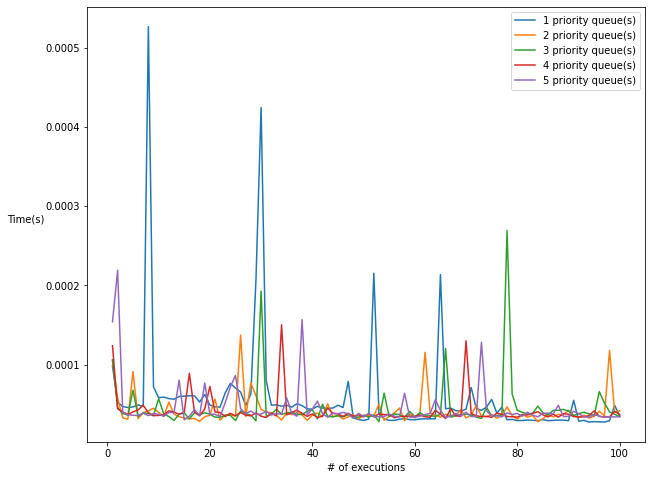

In [53]:
# example 1
epoches = 100
print("epoches:", epoches)

x = range(1, epoches + 1)

plt.figure(figsize=(10,8))

for k in range(1, 6):
  T = []
  for epoch in range(epoches):
    start_time = time.time()
    def heuristic(n):
              H_dist = {
                  'A': 10,
                  'B': 9,
                  'C': 999,
                  'D': 1,
                  'E': 6,
                  'G': 0,
              }
              return H_dist[n]

    A = Node('A', [2, 3], heuristic('A'))    # h value는 시작 노드, 도착 노드에 따라 바뀌므로 함수 사용
    B = Node('B', [2, 1, 9], heuristic('B'))
    C = Node('C', [1], heuristic('C'))
    D = Node('D', [6, 1], heuristic('D'))
    E = Node('E', [3, 6], heuristic('E'))
    G = Node('G', [9, 1], heuristic('G'))
    A.neighbors = [B, E]
    B.neighbors = [A, C, G]
    C.neighbors = [B]
    D.neighbors = [E, G]
    E.neighbors = [A, D]
    G.neighbors = [B, D]

    path, distance = aStarAlgo_Parallel(A, G, k)
    execution_time = time.time() - start_time
    T.append(execution_time)
  print("# of priority queues:", k)
  print("Shortest path:", path)
  print("Shortest distance:", distance)
  print(f"Mean execution time: {np.mean(T):.10f}\n")
  
  plt.plot(x, T, label=f"{k} priority queue(s)")
  time.sleep(0.5)

plt.xlabel("# of executions")
plt.ylabel("Time(s)          ", rotation=0)
plt.legend()
plt.show()

epoches: 100
# of priority queues: 1
Shortest path: ['A', 'C', 'F', 'I', 'G']
Shortest distance: 7
Mean execution time: 0.0000750375

# of priority queues: 2
Shortest path: ['A', 'C', 'F', 'I', 'G']
Shortest distance: 7
Mean execution time: 0.0000914407

# of priority queues: 3
Shortest path: ['A', 'C', 'F', 'I', 'G']
Shortest distance: 7
Mean execution time: 0.0000947571

# of priority queues: 4
Shortest path: ['A', 'C', 'F', 'I', 'G']
Shortest distance: 7
Mean execution time: 0.0001016235

# of priority queues: 5
Shortest path: ['A', 'C', 'F', 'I', 'G']
Shortest distance: 7
Mean execution time: 0.0001057720



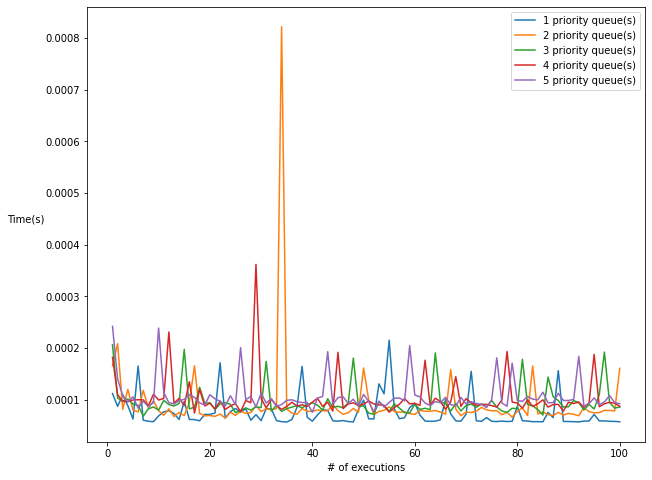

In [52]:
# example 2
epoches = 100
print("epoches:", epoches)

x = range(1, epoches + 1)

plt.figure(figsize=(10,8))

for k in range(1, 6):
  T = []
  for epoch in range(epoches):
    start_time = time.time()
    def heuristic(n):
          H_dist = {
              'A': 10,
              'B': 9,
              'C': 7,
              'D': 8,
              'E': 8,
              'F': 6,
              'G': 0,
              'H': 6,
              'I': 3,
              'J': 6,
              'K': 4,
              'L': 4,
              'M': 3,             
          }
          return H_dist[n]

    A = Node('A', [7, 2, 3], heuristic('A'))    # h value는 시작 노드, 도착 노드에 따라 바뀌므로 함수 사용
    B = Node('B', [7, 3, 4], heuristic('B'))
    C = Node('C', [2, 3, 4, 1], heuristic('C'))
    D = Node('D', [3, 2], heuristic('D'))
    E = Node('E', [4, 4, 5], heuristic('E'))
    F = Node('F', [1, 3, 2], heuristic('F'))
    G = Node('G', [2, 5], heuristic('G'))
    H = Node('H', [5, 3], heuristic('H'))
    I = Node('I', [2, 2], heuristic('I'))
    J = Node('J', [2, 4, 4], heuristic('J'))
    K = Node('K', [4, 6, 4], heuristic('K'))
    L = Node('L', [4, 6, 4], heuristic('L'))
    M = Node('M', [5, 4, 4], heuristic('M'))
    A.neighbors = [B, C, D]
    B.neighbors = [A, C, E]
    C.neighbors = [A, B, E, F]
    D.neighbors = [A, J]
    E.neighbors = [B, C, H]
    F.neighbors = [C, H, I]
    G.neighbors = [I, M]
    H.neighbors = [E, F]
    I.neighbors = [F, G]
    J.neighbors = [D, K, L]
    K.neighbors = [J, L, M]
    L.neighbors = [J, K, M]
    M.neighbors = [G, K, L]
    
    path, distance = aStarAlgo_Parallel(A, G, k)

    execution_time = time.time() - start_time
    T.append(execution_time)

  print("# of priority queues:", k)
  print("Shortest path:", path)
  print("Shortest distance:", distance)
  print(f"Mean execution time: {np.mean(T):.10f}\n")

  plt.plot(x, T, label=f"{k} priority queue(s)")
  time.sleep(0.5)

plt.xlabel("# of executions")
plt.ylabel("Time(s)          ", rotation=0)
plt.legend()
plt.show()

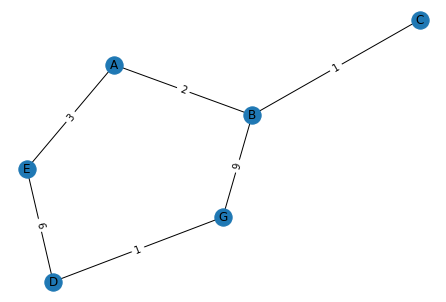

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'E', weight=3)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'G', weight=9)
G.add_edge('D', 'E', weight=6)
G.add_edge('D', 'G', weight=1)

pos = nx.spring_layout(G)

weights = list(nx.get_edge_attributes(G, 'weight').values())

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

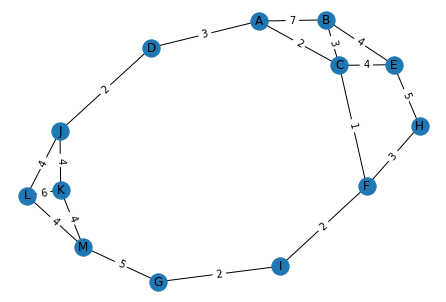

In [ ]:
G = nx.Graph()

G.add_edge('A', 'B', weight=7)
G.add_edge('A', 'C', weight=2)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'C', weight=3)
G.add_edge('B', 'E', weight=4)
G.add_edge('C', 'E', weight=4)
G.add_edge('C', 'F', weight=1)
G.add_edge('D', 'J', weight=2)
G.add_edge('E', 'H', weight=5)
G.add_edge('F', 'H', weight=3)
G.add_edge('F', 'I', weight=2)
G.add_edge('G', 'I', weight=2)
G.add_edge('G', 'M', weight=5)
G.add_edge('J', 'K', weight=4)
G.add_edge('J', 'L', weight=4)
G.add_edge('K', 'L', weight=6)
G.add_edge('K', 'M', weight=4)
G.add_edge('L', 'M', weight=4)

pos = nx.spring_layout(G)

weights = list(nx.get_edge_attributes(G, 'weight').values())

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()